In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("synthese-fra.csv")
df.head()

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-02,191.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,212.0,4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,2020-03-04,285.0,4,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
3,2020-03-05,423.0,7,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
4,2020-03-06,613.0,9,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN


On va utiliser ici uniquement la donnée correspondante au nombres de cas confirmés. Cette dernière étant cumulative, on va déterminer le nombre de nouveaux cas par jours. 

In [4]:
df = df[['date', 'total_cas_confirmes']]


df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [5]:
# Calculer les nouveaux cas en prenant la différence entre les valeurs cumulatives
df['new_covid'] = df['total_cas_confirmes'].diff().fillna(df['total_cas_confirmes'].iloc[0])
df.head()

,date,total_cas_confirmes,new_covid
0,2020-03-02,191.0,191.0
1,2020-03-03,212.0,21.0
2,2020-03-04,285.0,73.0
3,2020-03-05,423.0,138.0
4,2020-03-06,613.0,190.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 807 non-null    datetime64[ns]
 1   total_cas_confirmes  353 non-null    float64       
 2   new_covid            807 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 19.0 KB


In [7]:
null_values = df[df['total_cas_confirmes'].isna()]
null_values.head(10)

,date,total_cas_confirmes,new_covid
145,2020-07-25,NaN,191.0
146,2020-07-26,NaN,191.0
355,2021-02-20,NaN,191.0
356,2021-02-21,NaN,191.0
357,2021-02-22,NaN,191.0
358,2021-02-23,NaN,191.0
359,2021-02-24,NaN,191.0
360,2021-02-25,NaN,191.0
361,2021-02-26,NaN,191.0
362,2021-02-27,NaN,191.0


Les données sont récoltées jusqu'au 20 février 2021. on ne va donc conserver uniquement ces colonnes. 

In [8]:
df = df[df['date']<="2021-02-19"]

Text(0.5, 1.0, 'Evolution du nombre de nouveaux cas de Covid confirmés par jours (pas de data le week-end)')

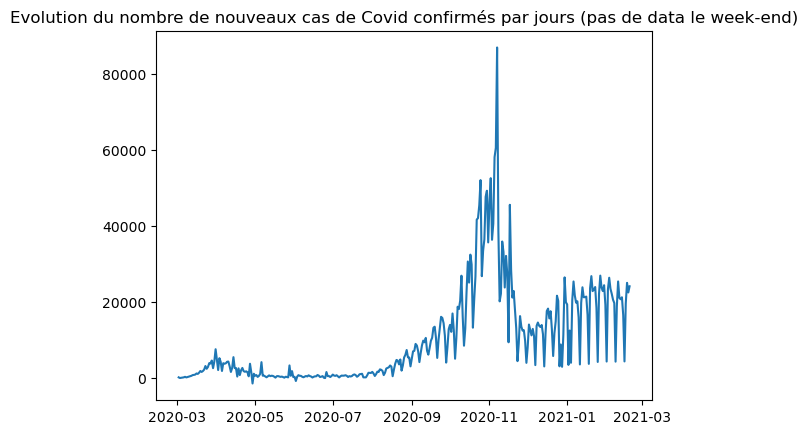

In [9]:
plt.plot(df['date'], df['new_covid'])
plt.title('Evolution du nombre de nouveaux cas de Covid confirmés par jours (pas de data le week-end)')

In [10]:
df = df.drop(columns='total_cas_confirmes')
df.head()

,date,new_covid
0,2020-03-02,191.0
1,2020-03-03,21.0
2,2020-03-04,73.0
3,2020-03-05,138.0
4,2020-03-06,190.0


In [11]:
start_date = '2020-01-01'
end_date = '2021-12-31'

# Créer une série de toutes les dates de la période souhaitée
all_dates = pd.date_range(start=start_date, end=end_date)

# Convertir la série de dates en DataFrame
all_dates_df = pd.DataFrame(all_dates, columns=['date'])

# Fusionner les dates avec le DataFrame d'origine
df_completed = pd.merge(all_dates_df, df, on='date', how='left')

# Remplir les valeurs manquantes de striker_ratio avec 0
df_completed['new_covid'] = df_completed['new_covid'].fillna(0)

df_completed.head()

,date,new_covid
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [14]:
hours = pd.DataFrame({'hour': range(24)})

# Fusionner les heures avec le DataFrame d'origine
df_completed['key'] = 1
hours['key'] = 1
df_full = pd.merge(df_completed, hours, on='key').drop('key', axis=1)
df_full['new_covid'] = df_full.groupby('date')['new_covid'].ffill()

df_full['date'] = pd.to_datetime(df_full['date'].astype(str) + ' ' + df_full['hour'].astype(str) + ':00:00')
df_full.drop(columns='hour')

,date,new_covid
0,2020-01-01 00:00:00,0.0
1,2020-01-01 01:00:00,0.0
2,2020-01-01 02:00:00,0.0
3,2020-01-01 03:00:00,0.0
4,2020-01-01 04:00:00,0.0
...,...,...
17539,2021-12-31 19:00:00,0.0
17540,2021-12-31 20:00:00,0.0
17541,2021-12-31 21:00:00,0.0
17542,2021-12-31 22:00:00,0.0


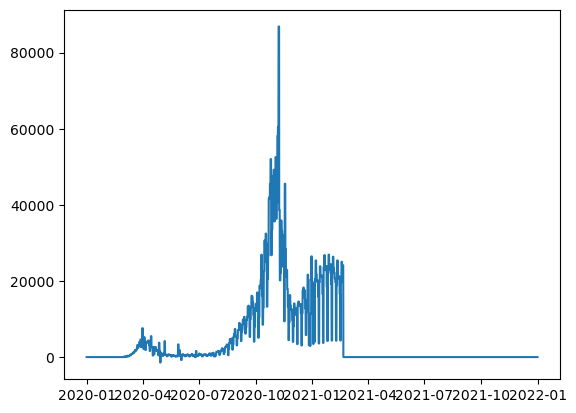

In [15]:
plt.plot(df_full['date'], df_full['new_covid'])

In [16]:
df_full.to_csv("Propre_nbr_Covid.csv", index=False)